<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ. Осень 2020.</b></h3>
Этот проект будет посвящен полноценному решению задачи машинного обучения.

# Метрика

В этом проекте мы будем использовать стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации. Также она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [30]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных.

1) Посмотрим на случайные строчки. 

2) Посмотрим, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, заменим их на что-то.

In [32]:
data = pd.read_csv('3_train.csv')

In [33]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [34]:
# Посмотрим, как выглядит наш датасет
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [35]:
'''
Посмотрим основную информацию о нашем датасете с помощью метода info. Он выводит информацию, включающую в себя
тип данных в столбце, кол-во ненулевых элементов и сколько памяти занимает датафрейм (это нас не интересует, поэтому ставим 
memory_usage=False).
'''
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [36]:
# Посмотрим, какие уникальные значения содержит наш датасет для каждого из столбцов
for (columnName, columnData) in data.iteritems():
   print('Colunm name : ', columnName)
   print('Column unique values: ', np.unique(columnData.values))
# Видим, что Nan`ов нет, однако столбец TotalSpent содержит пробелы

Colunm name :  ClientPeriod
Column unique values:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Colunm name :  MonthlySpending
Column unique values:  [ 18.25  18.4   18.7  ... 118.6  118.65 118.75]
Colunm name :  TotalSpent
Column unique values:  [' ' '100.2' '100.25' ... '997.65' '998.1' '999.9']
Colunm name :  Sex
Column unique values:  ['Female' 'Male']
Colunm name :  IsSeniorCitizen
Column unique values:  [0 1]
Colunm name :  HasPartner
Column unique values:  ['No' 'Yes']
Colunm name :  HasChild
Column unique values:  ['No' 'Yes']
Colunm name :  HasPhoneService
Column unique values:  ['No' 'Yes']
Colunm name :  HasMultiplePhoneNumbers
Column unique values:  ['No' 'No phone service' 'Yes']
Colunm name :  HasInternetService
Column unique values:  ['DSL' 'Fiber optic' 'No']
Colunm name :  HasOnlineSecuritySer

In [37]:
# Еще один вариант проверки на Nan с помощью isna - Nan`ов нет
print(data.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [38]:
# Посчитаем количество строк с пропущенным значением:
print(np.sum(data['TotalSpent'] == ' ')) # их 9 штук

9


In [39]:
# Проверим эти строки
data[data['TotalSpent'] == ' '] # Это клиенты, у которых ClientPeriod = 0, то есть они недавно присоединились к услугам компании.

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [40]:
# Их всего 9 из 5282, поэтому просто удалим их из датасета:
data = data[data['TotalSpent'] != ' ']
# Изменим тип данных в столбце TotalSpent, так как это будет необходимо для построения графиков
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
# Проверим, применились ли наши изменения
data.info(memory_usage=False)

## Анализ данных.

1) Для численных признаков построим гистограмму. Для категориальных признаков посчитаем количество каждого значения для каждого признака. Для каждого столбца сделаем *data.value_counts()* и построим круговые диаграммы *plt.pie(...)*. 

2) Посмотрим на распределение целевой переменной и определим, являются ли классы несбалансированными.

В случае несбалансированных классов нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

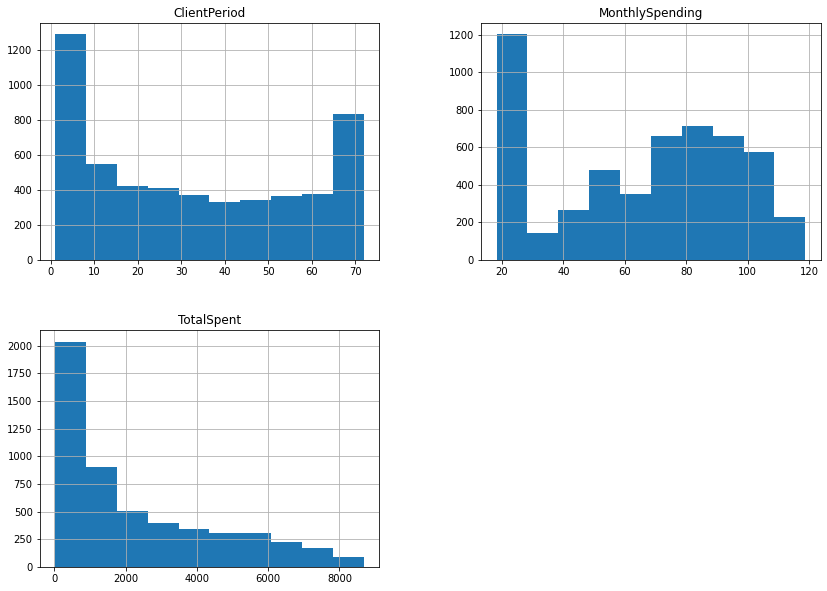

In [42]:
# Для численных признаков построим гистограмму:
data.hist(column=num_cols, figsize=(14, 10))
None

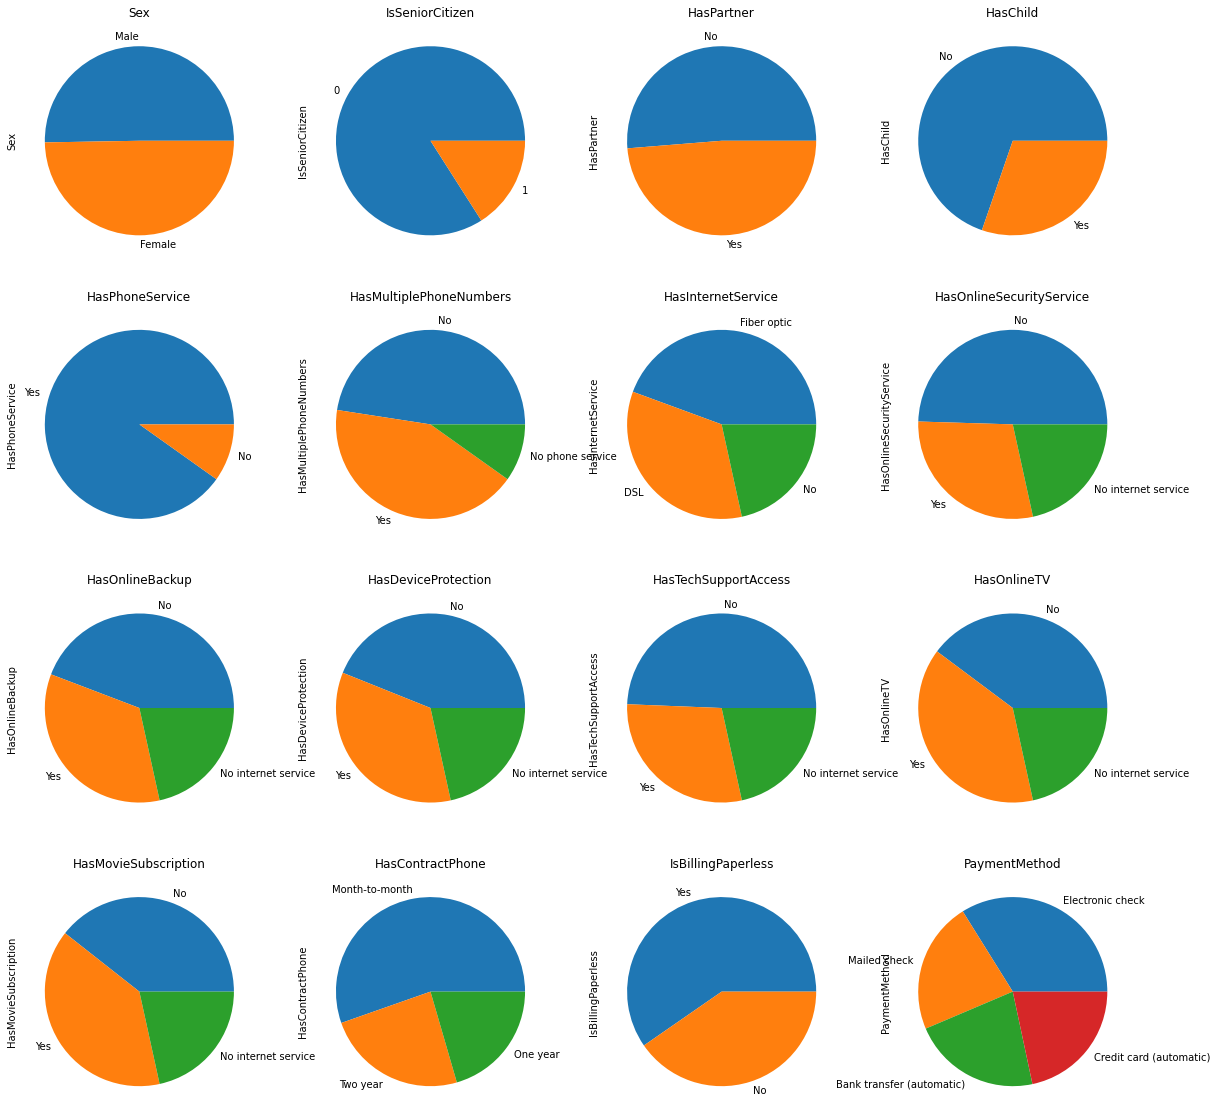

In [43]:
# Для категориальных посчитаем количество значений для каждого признака и построим круговые диаграммы, располагая их на одном графике
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.ravel()
for i, categorical_feature in enumerate(data[cat_cols]):
  data[categorical_feature].value_counts().plot(kind='pie', ax=ax[i]).set_title(categorical_feature)

In [44]:
# Посмотрим на распределение целевой переменной
data[target_col].value_counts()
# Датасет является слабо несбалансированным, поэтому дополнительных шагов предпринимать не нужно

0    3889
1    1384
Name: Churn, dtype: int64

## Применение линейных моделей.

1) Обработаем данные для того, чтобы к ним можно было применить LogisticRegression: отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации протестируем разные значения гиперпараметра C и выберем лучший по метрике ROC-AUC.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [46]:
# Кодировать бинарные категориальные признаки чрезмерно, поэтому просто превратим их в бинарные признаки
new_data = data.copy()
new_data['Sex'] = np.where(new_data['Sex'] == 'Female', 1, 0)

binary_cat_cols = ['HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless']

for column in binary_cat_cols:
  new_data[column] = np.where(new_data[column] == 'Yes', 1, 0)

In [47]:
# Закодируем оставшиеся категориальные признаки с помощью one hot encoding
nonbinary_cat_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'                   
]
new_data = pd.get_dummies(new_data, columns=nonbinary_cat_cols)

cat_cols_new = list(new_data.columns)
cat_cols_new.remove(target_col)
for num_col in num_cols:
  cat_cols_new.remove(num_col)

In [48]:
X, y = new_data[num_cols + cat_cols_new], new_data[target_col]

In [49]:
cls = make_pipeline(
    StandardScaler(),
    LogisticRegression())

param_grid = [{
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],   
}]

grid_search = GridSearchCV(cls, 
                           param_grid,
                           cv=10,
                           error_score=roc_auc_score,
                           verbose=10)
grid_search.fit(X, y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.820, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.822, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.805, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.791, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.787, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.797, total=   0.2s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.801, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.825, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.789, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.805, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.820, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.824, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.805, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.791, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.787, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.797, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.3s finished


GridSearchCV(cv=10, error_score=<function roc_auc_score at 0x7fb5fc3c6ea0>,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                             

Выпишем лучшее качество и с какими параметрами нам удалось его получить:

In [50]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'logisticregression__C': 0.1}
0.8046575815076764


C=1.

Качество: 0.81.

## Применение градиентного бустинга.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях, не нужно.

1) Протестируем catboost cо стандартными параметрами с помощью кросс валидации.

2) Протестируем разные значения параметров количества деревьев и learning_rate'а и выберем лучшую комбинацию по метрике ROC-AUC. 


In [22]:
!pip install catboost

     |████████████████████████████████| 66.2MB 44kB/s 


In [51]:
from catboost import CatBoostClassifier

In [52]:
X, y = data[num_cols + cat_cols], data[target_col]

In [53]:
boosting_model = CatBoostClassifier(cat_features=cat_cols,
                                    eval_metric='AUC:hints=skip_train~false')

param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [1, 2, 3, 4, 5, 7, 9]}
boosting_model.grid_search(param_grid,
                           X, 
                           y,
                           cv = 3)


bestTest = 0.8659647881
bestIteration = 940

0:	loss: 0.8659648	best: 0.8659648 (0)	total: 4.01s	remaining: 4m 36s

bestTest = 0.8655101399
bestIteration = 464

1:	loss: 0.8655101	best: 0.8659648 (0)	total: 8.15s	remaining: 4m 37s

bestTest = 0.8656993718
bestIteration = 403

2:	loss: 0.8656994	best: 0.8659648 (0)	total: 12.2s	remaining: 4m 31s

bestTest = 0.8653503986
bestIteration = 127

3:	loss: 0.8653504	best: 0.8659648 (0)	total: 16.4s	remaining: 4m 30s

bestTest = 0.8661441898
bestIteration = 364

4:	loss: 0.8661442	best: 0.8661442 (4)	total: 20.4s	remaining: 4m 25s

bestTest = 0.8660532602
bestIteration = 130

5:	loss: 0.8660533	best: 0.8661442 (4)	total: 24.7s	remaining: 4m 23s

bestTest = 0.8651808271
bestIteration = 387

6:	loss: 0.8651808	best: 0.8661442 (4)	total: 28.7s	remaining: 4m 18s

bestTest = 0.8648711748
bestIteration = 141

7:	loss: 0.8648712	best: 0.8661442 (4)	total: 32.9s	remaining: 4m 15s

bestTest = 0.8658886038
bestIteration = 422

8:	loss: 0.8658886	best: 0

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [54]:
print(boosting_model.get_best_score())

{'learn': {'Logloss': 0.3797953729212912, 'AUC': 0.8732234611628767}}


Выпишем какое наилучшее качество и с какими параметрами нам удалось получить:
AUC = 87.32.
Параметры: depth = 2, l2_leaf_reg = 9, learning_rate = 0.1

# Предсказания

In [55]:
best_model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', depth=2, l2_leaf_reg=2, learning_rate=0.1)
best_model.fit(data[num_cols + cat_cols], data[target_col])

0:	total: 5.21ms	remaining: 5.2s
1:	total: 11ms	remaining: 5.5s
2:	total: 15.4ms	remaining: 5.1s
3:	total: 20.8ms	remaining: 5.17s
4:	total: 25.2ms	remaining: 5.01s
5:	total: 29.7ms	remaining: 4.92s
6:	total: 33.8ms	remaining: 4.8s
7:	total: 38.6ms	remaining: 4.78s
8:	total: 43.1ms	remaining: 4.74s
9:	total: 47.1ms	remaining: 4.66s
10:	total: 50.7ms	remaining: 4.56s
11:	total: 54.8ms	remaining: 4.51s
12:	total: 58.2ms	remaining: 4.42s
13:	total: 61.7ms	remaining: 4.34s
14:	total: 65.9ms	remaining: 4.33s
15:	total: 70ms	remaining: 4.3s
16:	total: 73.9ms	remaining: 4.27s
17:	total: 77.9ms	remaining: 4.25s
18:	total: 81.7ms	remaining: 4.22s
19:	total: 85.7ms	remaining: 4.2s
20:	total: 89.1ms	remaining: 4.15s
21:	total: 93.2ms	remaining: 4.14s
22:	total: 96.8ms	remaining: 4.11s
23:	total: 101ms	remaining: 4.12s
24:	total: 106ms	remaining: 4.11s
25:	total: 109ms	remaining: 4.1s
26:	total: 114ms	remaining: 4.11s
27:	total: 118ms	remaining: 4.09s
28:	total: 121ms	remaining: 4.06s
29:	total: 1

In [56]:
X_test = pd.read_csv('./3_test.csv')
submission = pd.read_csv('./3_submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

Kaggle score: 0.85384